In [1]:
lines = """2199943210
3987894921
9856789892
8767896789
9899965678
""".splitlines()

In [2]:
with open('d9.txt') as f:
    lines = f.read().splitlines()

In [3]:
matrix = [list(map(int, list(line))) for line in lines]

In [4]:
def get_neighbors(matrix, x, y):
    ops = [+1, -1, 0]
    neighbors = []
    for x_op in ops:
        for y_op in ops:
            try:
                x_, y_ = x + x_op, y + y_op
                if (x_ < 0 or y_ < 0) or (x_op == 0 and y_op == 0): continue
                neighbors.append(matrix[x_][y_])
            except Exception:
                continue
    return neighbors

In [5]:
sum_ = 0
for x in range(len(matrix)):
    for y in range(len(matrix[0])):
        n = matrix[x][y]
        neighbors = get_neighbors(matrix, x, y)
        if all(n < neighbor for neighbor in neighbors):
            sum_ += n + 1

In [6]:
sum_

456

# Part 2

In [13]:
import networkx as nx, math
import matplotlib.pyplot as plt

In [8]:
graph = nx.Graph()

In [9]:
def get_neighbors(matrix, x, y):
    ops = [+1, -1]
    neighbors = []
    for x_op in ops:
        try:
            neighbor = matrix[x + x_op][y]
        except IndexError:
            continue
        if neighbor != 9: neighbors.append((x + x_op, y))
    for y_op in ops:
        try:
            neighbor = matrix[x][y + y_op]
        except IndexError:
            continue
        if neighbor != 9: neighbors.append((x, y + y_op))
    return neighbors

In [10]:
for x in range(len(matrix)):
    for y in range(len(matrix[0])):
        n = matrix[x][y]
        if n == 9: continue
        neighbor_idxs = get_neighbors(matrix, x, y)
        for n_x, n_y in neighbor_idxs:
            graph.add_edge((x,y), (n_x, n_y))

In [11]:
sizes = []
for basin in nx.connected_components(graph):
    sizes.append(len(basin))


In [12]:
math.prod(sorted(sizes)[-3:])

1047744

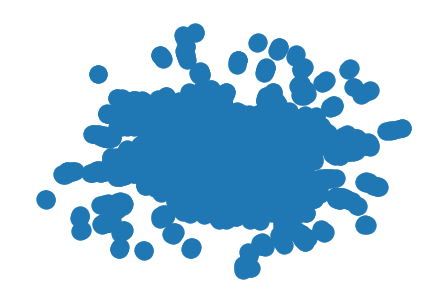

In [14]:
nx.draw(graph)